In [1]:
import time
from pdp_lib import preprocessing
from pdp_lib import save_pics
from pdp_lib import util
from pdp_lib import processing
import matplotlib.pyplot as plt
import numpy as np


# Load file (Use realative path)


In [2]:
start_time = time.time()
filename = 'pdp_instances/LiLim/pdp_200/LC1_2_1.txt'
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


# Instance File ----> Nodes

--- 0.001999378204345703 seconds ---


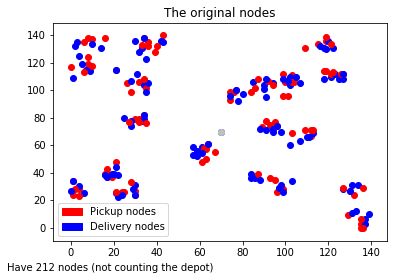

In [3]:
start_time = time.time()
nodes = preprocessing.load_node(filename)
print("--- %s seconds ---" % (time.time() - start_time))

#draw the original nodes
util.draw_original_nodes(nodes)

# Adding Depots

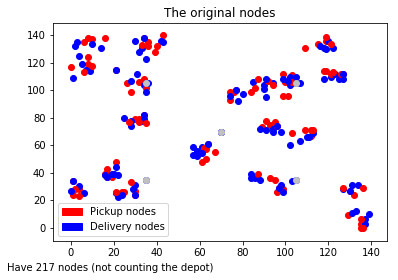

In [4]:
added_nodes = processing.add_depots(nodes)
util.draw_added_nodes(added_nodes)

# Nodes ----> Requests

--- 0.0 seconds ---


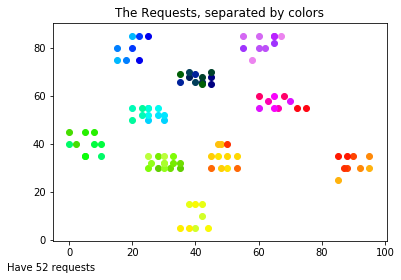

In [37]:
start_time = time.time()
requests = preprocessing.generate_request(nodes)
print("--- %s seconds ---" % (time.time() - start_time))

# draw requests
util.draw_requests(requests)

# Create Distance Matrix

In [38]:
start_time = time.time()
distances = processing.create_distance_matrix(nodes)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.023035287857055664 seconds ---


# Clustering requests into Clusters (Requests ----> Clusters)

--- used 0.06096816062927246 seconds ---


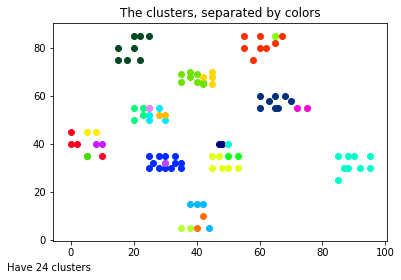

In [39]:
start_time = time.time()
clusters = processing.clustering_requests_only_first(requests)
print("--- used %s seconds ---" % (time.time() - start_time))
util.draw_clusters(clusters)

# Clusters Statistics

In [40]:
one_request_cluster=0
hist=[]
for cluster in clusters:
    hist.append(len(cluster))
    if(len(cluster)==1):
        one_request_cluster+=1
hist = np.array(hist)
plt.hist(hist)
plt.title("Clusters Histogram")
plt.xlabel("Number of Requests")
plt.ylabel("Frequency")
print('Number of one-request clusters = '+str(one_request_cluster))

Number of one-request clusters = 12


average request per cluster =2.1666666666666665
Maximum cluster have 6 requests, and is number 3
Unoptimized distances = 624.7603100248294
Below is the cluster with most requests


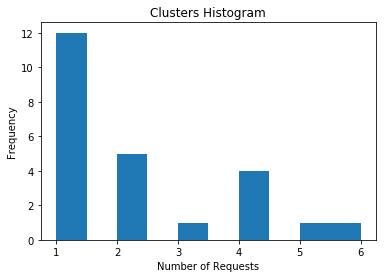

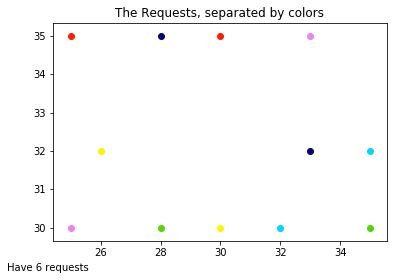

In [41]:

unoptimized_distances = processing.request_distances(requests) 
max_req = -1
sum_req = 0
max_clus_num = -1
i = 0
for cluster in clusters:
    if(len(cluster)>max_req):
        max_req = len(cluster)
        max_clus_num = i 
    sum_req += len(cluster)
    i += 1

print("average request per cluster =" +str(sum_req/len(clusters)))
print("Maximum cluster have "+str(max_req) + " requests, and is number " +str(max_clus_num))
print("Unoptimized distances = "+ str(unoptimized_distances))

print("Below is the cluster with most requests")
util.draw_cluster(clusters[max_clus_num])

In [42]:
util.print_requests(clusters[max_clus_num])

p_node = 42 ,at(33,32),ET = 68 ,LT = 149 ,			d_node = 49 ,at(28,35),ET = 1001 ,LT = 1066 ,			
p_node = 41 ,at(35,32),ET = 166 ,LT = 235 ,			d_node = 44 ,at(32,30),ET = 359 ,LT = 412 ,			
p_node = 40 ,at(35,30),ET = 264 ,LT = 321 ,			d_node = 48 ,at(28,30),ET = 0 ,LT = 1122 ,			
p_node = 45 ,at(30,30),ET = 541 ,LT = 600 ,			d_node = 50 ,at(26,32),ET = 0 ,LT = 1123 ,			
p_node = 52 ,at(25,35),ET = 0 ,LT = 1124 ,			d_node = 47 ,at(30,35),ET = 0 ,LT = 1127 ,			
p_node = 43 ,at(33,35),ET = 0 ,LT = 1129 ,			d_node = 51 ,at(25,30),ET = 0 ,LT = 1121 ,			


# Top 5 Clusters


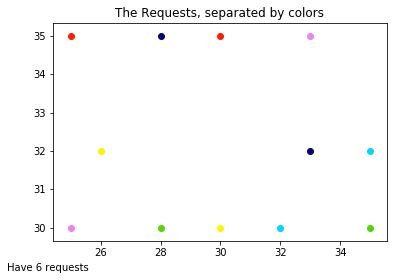

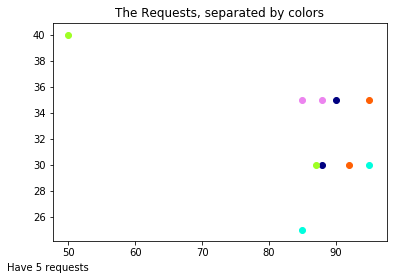

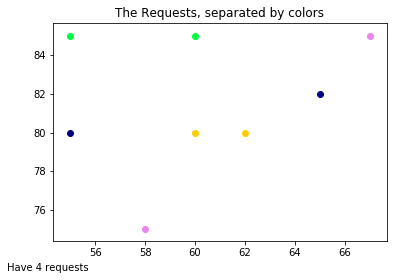

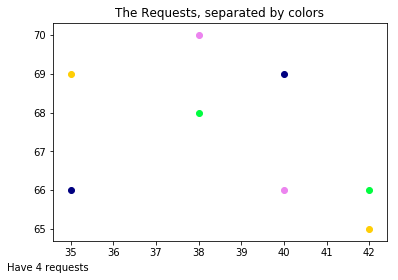

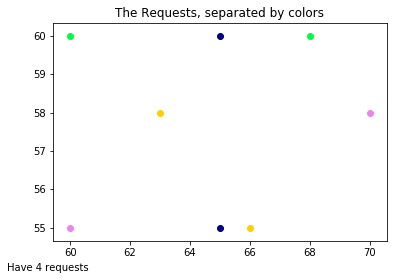

In [43]:
clusters_sorted = clusters
clusters_sorted.sort(key = len)
clusters_sorted.reverse()
for i in range(5):
    util.draw_cluster(clusters_sorted[i])